# SALES DATASET : EDA

### GOAL
##### The goal of this sales analysis is to explore and understand key patterns, trends, and insights within the sales dataset. This includes identifying top-performing products, analyzing revenue across categories and time periods, evaluating sales by region or customer segments, and uncovering factors that influence sales performance. The analysis aims to support data-driven decision-making for inventory planning, marketing strategies, and revenue optimization.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## FETCHINGH DATA FROM CSV FILE

In [3]:
df = pd.read_csv("sales_data.csv")

In [4]:
df

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [5]:
df.head(5)

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [6]:
df.tail(5)

,date,product,category,price,quantity,revenue
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0
368,2022-12-31,Hoodie,Clothing,40.0,30.0,1200.0


## CHECKING FOR NULL VALUES

In [7]:
df.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [8]:
df[df["price"].isnull()]

,date,product,category,price,quantity,revenue
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


### FIXING NULL VALUES IN PRICE COLUMN

In [9]:
df["price"][df["price"].isnull()] = df["revenue"]/df["quantity"]

In [10]:
df[df["price"].isnull()]

,date,product,category,price,quantity,revenue


In [11]:
df.isnull().sum()

date        0
product     0
category    0
price       0
quantity    1
revenue     1
dtype: int64

### FIXING NULL VALUES IN QUANTITY COLUMN

In [12]:
df["quantity"][df["quantity"].isnull()] = df["revenue"]/df["price"]

In [13]:
df.isnull().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     1
dtype: int64

### FIXING NULL VALUES IN REVENUE COLUMN

In [14]:
df["revenue"][df["revenue"].isnull()] = df["quantity"]*df["price"]

In [15]:
df.isnull().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     369 non-null    float64
 4   quantity  369 non-null    float64
 5   revenue   369 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


## FIXING DATA TYPES AS PER REQUIRED IN COLUMNS

In [17]:
df["price"] = df["price"].astype("int64")
df["revenue"] = df["revenue"].astype("int64")
df["quantity"] = df["quantity"].astype("int64")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      369 non-null    object
 1   product   369 non-null    object
 2   category  369 non-null    object
 3   price     369 non-null    int64 
 4   quantity  369 non-null    int64 
 5   revenue   369 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 17.4+ KB


## CHECKING AND FIXING FOR DUPLICATE VAUES

In [19]:
df.duplicated().sum()

np.int64(1)

In [20]:
df=df.drop_duplicates()

In [21]:
df.duplicated().sum()

np.int64(0)

## CHECKING AND FIXING TYPING ERRORS

In [22]:
df["category"].unique()

array(['Electronics', 'Clothing', 'Accessories', 'Bags', 'Shoes',
       'Clohting', 'Bgas', 'Shoeses'], dtype=object)

In [23]:
df["category"][df["category"]=="Clohting"] = "Clothing"
df["category"][df["category"]=="Bgas"] = "Bags"
df["category"][df["category"]=="Shoeses"] = "Shoes"

In [24]:
df["category"].unique()

array(['Electronics', 'Clothing', 'Accessories', 'Bags', 'Shoes'],
      dtype=object)

In [25]:
print("The Total revenue generated : ",df["revenue"].sum())

The Total revenue generated :  759130


## MAXIMUM REVENUE GENERATED FROM PRODUCTS

In [26]:
max(df.groupby("product")["revenue"].sum())

434400

In [27]:
rvbycat = df.groupby("product")["revenue"].sum()

In [28]:
rvbycat[rvbycat == rvbycat.max()]

product
Smartphone    434400
Name: revenue, dtype: int64

In [29]:
avgpricebypro = df.groupby("product")["price"].mean()

In [30]:
avgpricebypro

product
Backpack        50.0
Coat           100.0
Headphones     100.0
Hoodie          40.0
Jeans           50.0
Laptop        1200.0
Smartphone     600.0
Smartwatch     200.0
Sneakers        80.0
Speaker         80.0
T-Shirt         20.0
Tablet         400.0
Wallet          30.0
Watch          150.0
Name: price, dtype: float64

In [31]:
df.groupby("product")["quantity"].sum()

product
Backpack       408
Coat           338
Headphones     180
Hoodie         495
Jeans          413
Laptop           5
Smartphone     724
Smartwatch     304
Sneakers       270
Speaker        496
T-Shirt       1005
Tablet          45
Wallet         440
Watch          218
Name: quantity, dtype: int64

In [32]:
avgrev = df.groupby("quantity")["revenue"].mean()

In [33]:
avgrev

quantity
3     1200.000000
4     1600.000000
5      940.740741
6     3000.000000
7     4078.260870
8     1302.500000
9     4500.000000
10    2573.170732
11    6600.000000
12    3403.333333
15    1015.625000
18    1245.000000
20    1075.000000
22    1760.000000
25    1108.695652
30     920.000000
35     840.000000
40    1100.000000
50    1000.000000
Name: revenue, dtype: float64

In [34]:
df["date"] = pd.to_datetime(df["date"])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      368 non-null    datetime64[ns]
 1   product   368 non-null    object        
 2   category  368 non-null    object        
 3   price     368 non-null    int64         
 4   quantity  368 non-null    int64         
 5   revenue   368 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 20.1+ KB


In [36]:
df["quater"] = df["date"].dt.quarter

In [37]:
df.groupby("quater")["revenue"].sum()

quater
1    182100
2    185970
3    197680
4    193380
Name: revenue, dtype: int64

In [40]:
df["quater"].value_counts().reset_index()

,quater,count
0,4,93
1,1,92
2,3,92
3,2,91


## VISUALIZATION OF ANALYSED DATA

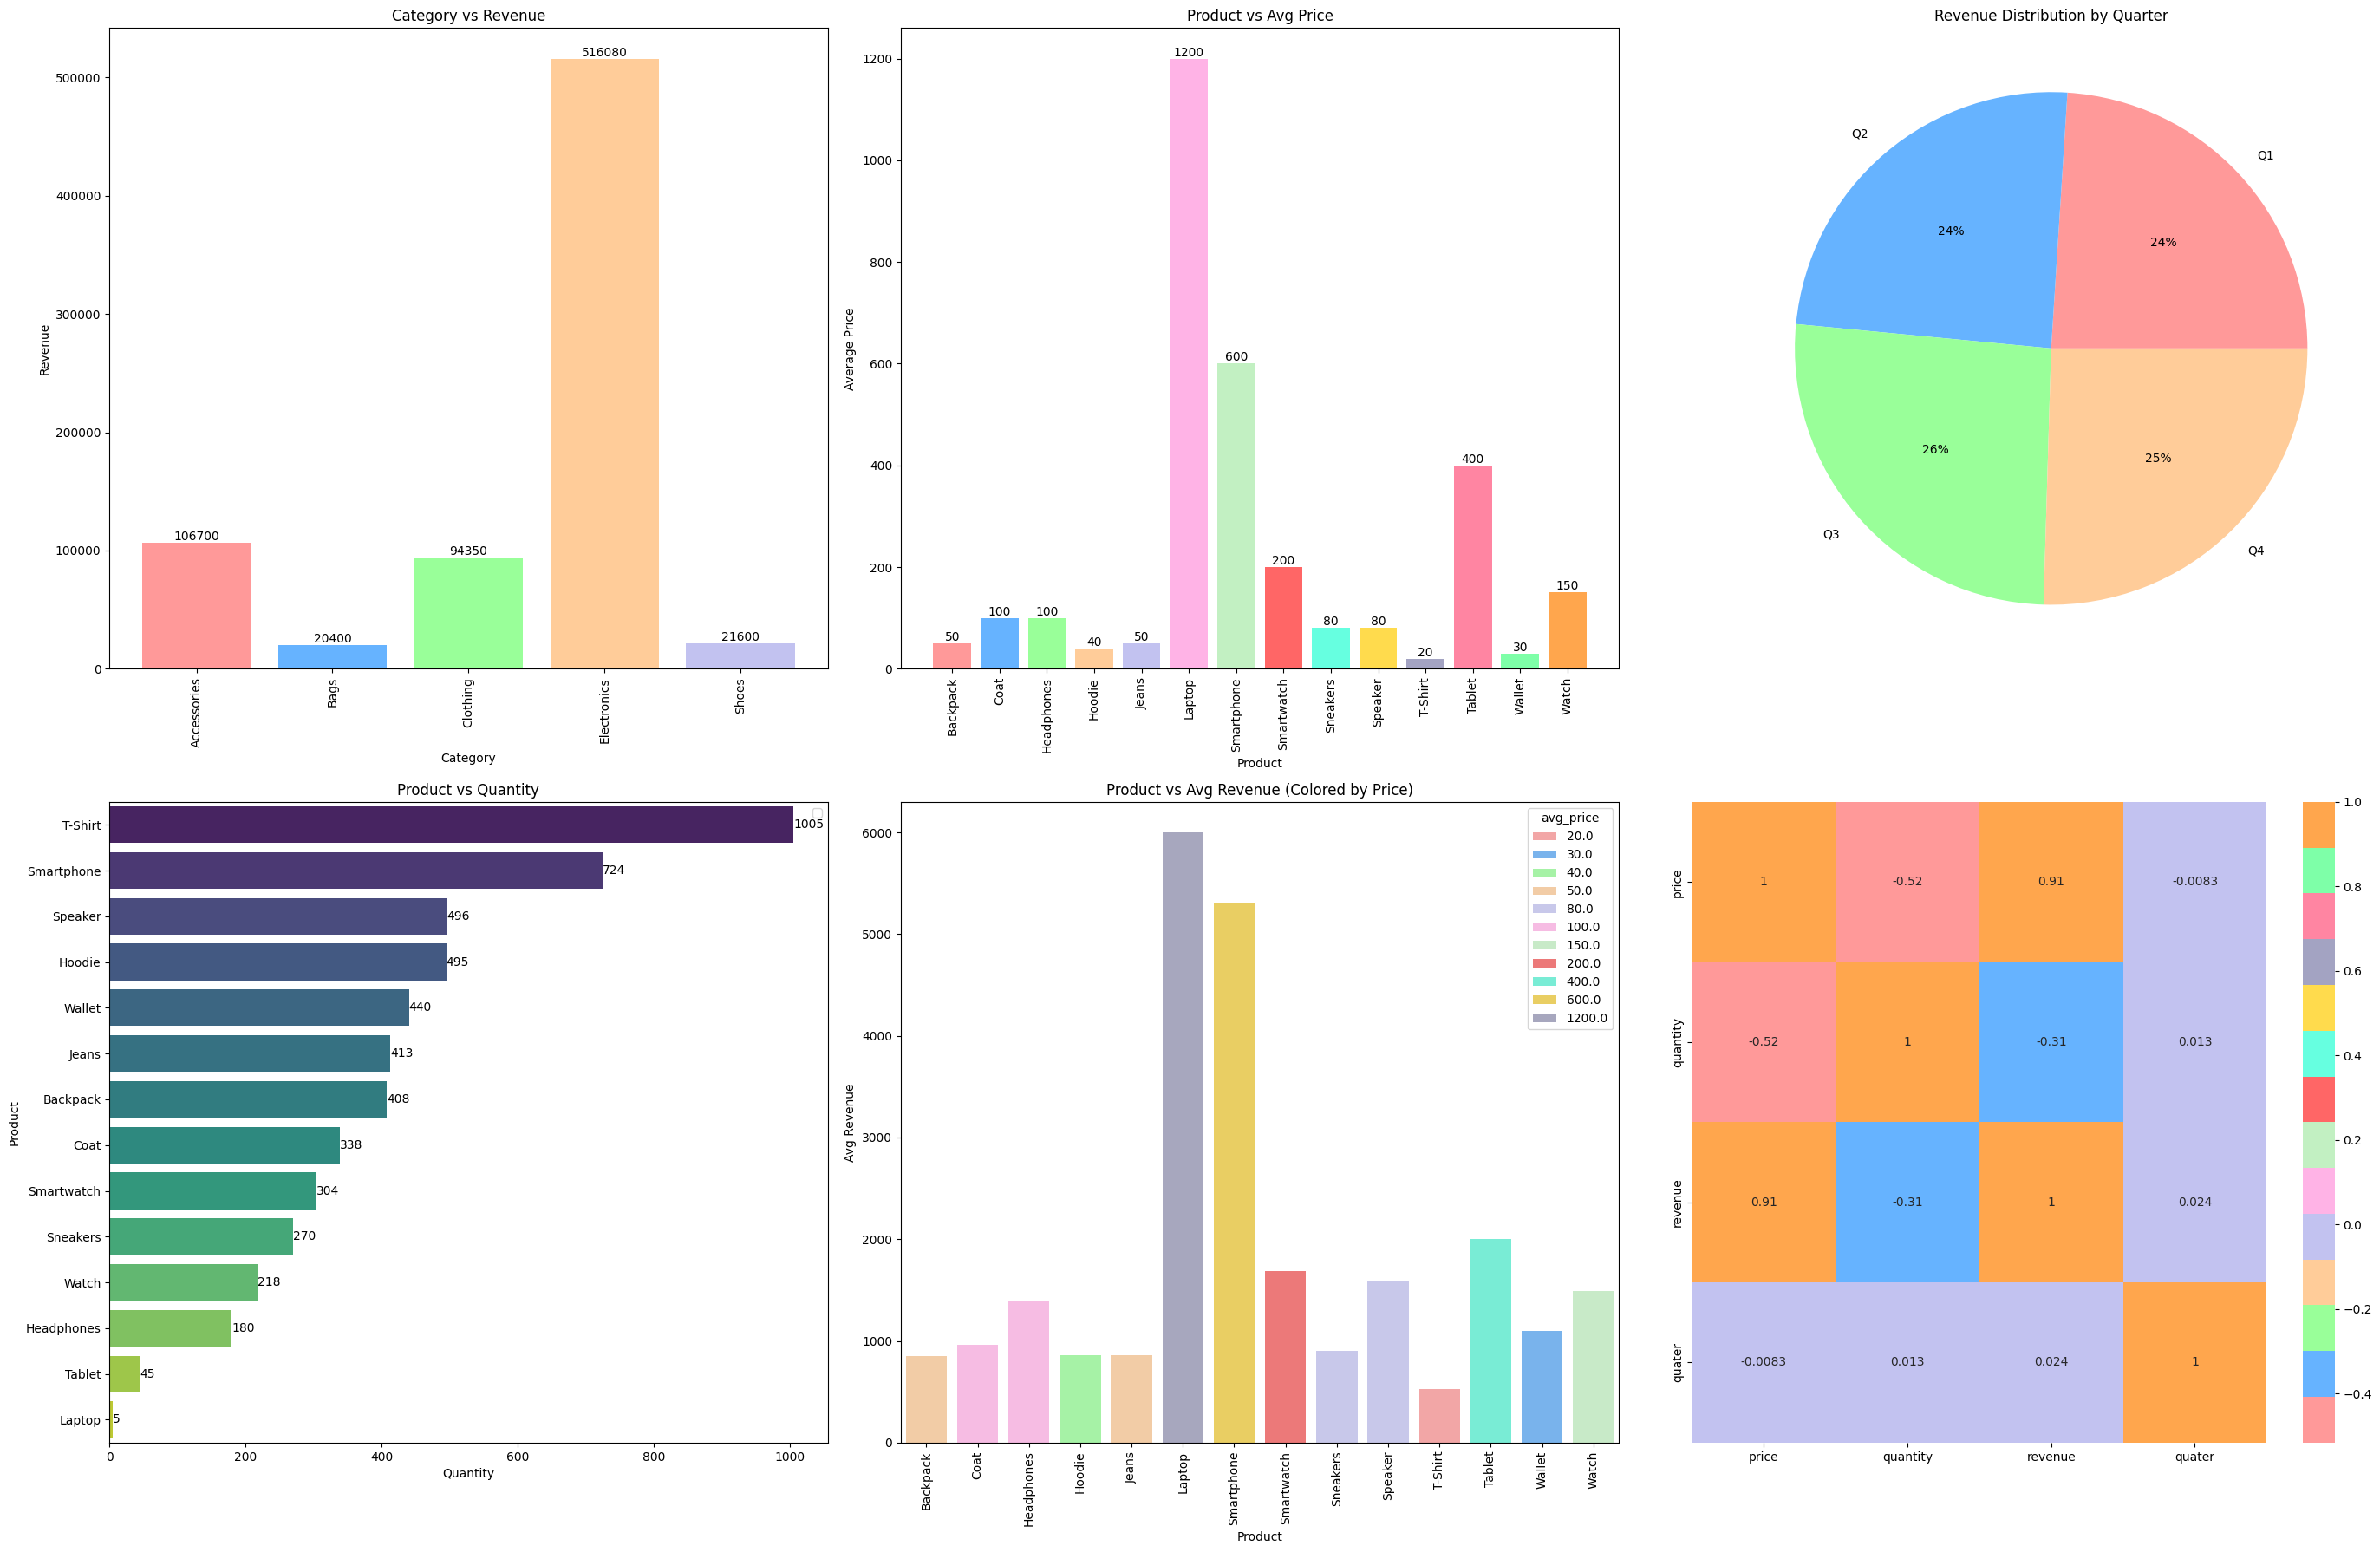

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
colors_list = [
    '#ff9999',  # light red/pink
    '#66b3ff',  # light blue
    '#99ff99',  # light green
    '#ffcc99',  # light orange
    '#c2c2f0',  # lavender/light purple
    '#ffb3e6',  # pink
    '#c2f0c2',  # pale green
    '#ff6666',  # brighter red
    '#66ffe0',  # aqua/cyan
    '#ffdb4d',  # mustard yellow
    '#a3a3c2',  # muted purple/gray
    '#ff85a2',  # coral pink
    '#7effa8',  # mint green
    '#ffa64d'   # warm orange
]



# Grouped data
y = df.groupby("category")["revenue"].sum()
x = y.index

z = list(df.groupby("quater")["revenue"].sum())

y1 = df.groupby("product")["price"].mean()
x1 = y1.index

y2 = df.groupby("product")["quantity"].sum()
x2 = y2.index
data2 = y2.reset_index()
data2 = data2.sort_values("quantity", ascending=False)

y3 = df.groupby("product")["revenue"].mean()
x3 = y3.index

# Create a DataFrame for scatter plot
scatter_df = pd.DataFrame({
    "product": x3,
    "avg_revenue": y3.values,
    "avg_price": df.groupby("product")["price"].mean().values
})

palette_color = sns.color_palette('bright')

# Create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(28, 18))

# 1. Bar plot: Category vs Revenue
bars0 = axes[0, 0].bar(x, y, color=colors_list)
axes[0, 0].bar_label(bars0)
axes[0, 0].set_title("Category vs Revenue")
axes[0, 0].set_xlabel("Category")
axes[0, 0].set_ylabel("Revenue")
axes[0, 0].tick_params(axis='x', rotation=90)

# 2. Product vs Average Price
bars1 = axes[0, 1].bar(x1, y1, color=colors_list)
axes[0, 1].bar_label(bars1)
axes[0, 1].set_title("Product vs Avg Price")
axes[0, 1].set_xlabel("Product")
axes[0, 1].set_ylabel("Average Price")
axes[0, 1].tick_params(axis='x', rotation=90)

# 3. Pie Chart: Revenue by Quarter

axes[0, 2].pie(z, labels=["Q1", "Q2", "Q3", "Q4"], colors=colors_list, autopct='%.0f%%')
axes[0, 2].set_title("Revenue Distribution by Quarter")

# 4. Product vs Quantity (horizontal barplot)
bars2 = sns.barplot(data=data2, x='quantity', y='product', ax=axes[1, 0], palette="viridis")
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container)

axes[1,0].legend()
axes[1, 0].set_title("Product vs Quantity")
axes[1, 0].set_ylabel("Product")
axes[1, 0].set_xlabel("Quantity")

# 5. Scatter Plot: Product vs Avg Revenue (colored by Avg Price)
sns.barplot(data=scatter_df, x="product", y="avg_revenue", hue="avg_price", palette=colors_list, ax=axes[1, 1])
axes[1, 1].set_title("Product vs Avg Revenue (Colored by Price)")
axes[1, 1].set_xlabel("Product")
axes[1, 1].set_ylabel("Avg Revenue")
axes[1, 1].tick_params(axis='x', rotation=90)

# 6. Leave empty
# axes[1, 2].axis('off')  # Optional
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot = True, cmap = colors_list, ax=axes[1,2])

plt.tight_layout()
plt.show()
